<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro-to-ML/blob/cristian/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem 1*** standard linear regression

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
file_path = '/content/drive/My Drive/ML-4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NUll values in the dataset, hence it is clean

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [119]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Applying the function to the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [120]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


In [121]:
def gradient_descent_penalty(X_train, X_val, y_train, y_val, learning_rate, n_iterations, m, theta, penalty):
  # initial values
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  train_losses = []
  val_losses = []

  for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    gradients[1:] += (2*penalty/m) * theta[1:]
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

  return train_losses, val_losses, theta

In [122]:
def gradient_descent(X_train, X_val, y_train, y_val, learning_rate, n_iterations, m, theta):
  # initial values
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  train_losses = []
  val_losses = []

  for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

  return train_losses, val_losses, theta

In [123]:
# Problem 1a

# Select data for input and exract data for training set
selected_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# extract the output
y_train = df_train['price'].values.reshape(-1, 1)
# extract the input needed
X_train = df_train[selected_input].values

# use test set as validation set
X_val = df_test[selected_input].values
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 25
m = len(X_train)

theta_0 = np.zeros((X_train.shape[1] + 1, 1))

train_losses, val_losses, theta_0 = gradient_descent(X_train, X_val, y_train, y_val, learning_rate, n_iterations, m, theta_0)

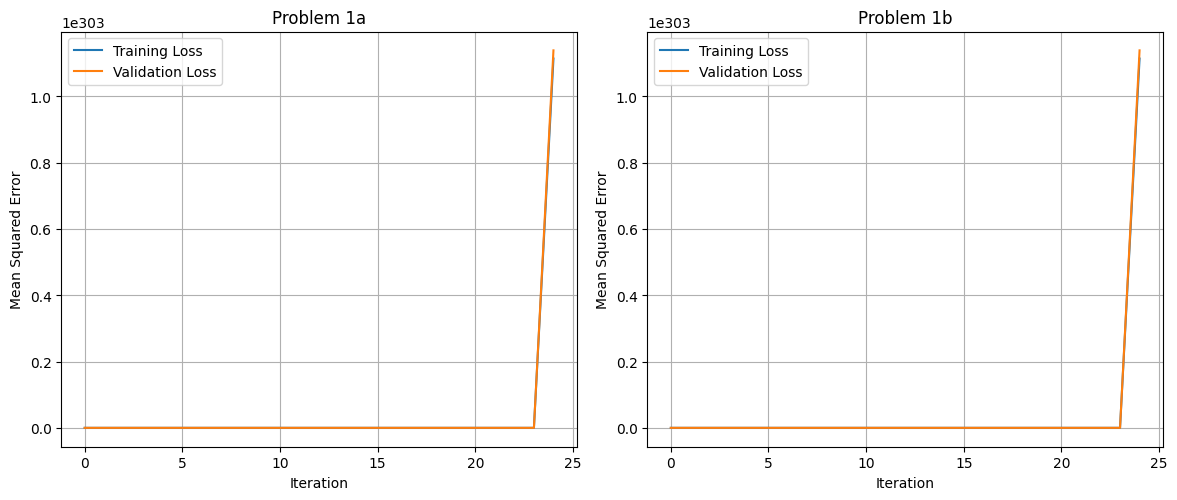

In [124]:
# Problem 1b

# new input dataset for training
selected_input_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_train = df_train[selected_input_1].values
y_train = df_train['price'].values.reshape(-1, 1)

# Extract the validation (test) set
X_val = df_test[selected_input_1].values
y_val = df_test['price'].values.reshape(-1, 1)  # y_val also previously defined

# initial values
learning_rate = 0.01
n_iterations = 25
m = len(X_train)
theta_1 = np.zeros((X_train.shape[1] + 1, 1))

# Train a simple linear regression model using gradient descent
train_losses_1b, val_losses_1b, theta_1 = gradient_descent(X_train, X_val, y_train, y_val, learning_rate, n_iterations, m, theta_1)

# Plot the training and validation loss after each iteration
plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout(pad = 2)

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1a")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses_1b, label="Training Loss")
plt.plot(val_losses_1b, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1b")
plt.grid(True)

plt.show()


In [125]:
print("Best parameters 1a:", theta_0[:5].T)
print("Best parameters 1b:", theta_1[:5].T)

Best parameters 1a: [[9.90446808e+143 5.98484218e+147 2.95329852e+144 1.31790186e+144
  1.82502423e+144]]
Best parameters 1b: [[9.90447588e+143 5.98484687e+147 2.95330085e+144 1.31790290e+144
  1.82502566e+144]]


In [126]:
# For Problem 2
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

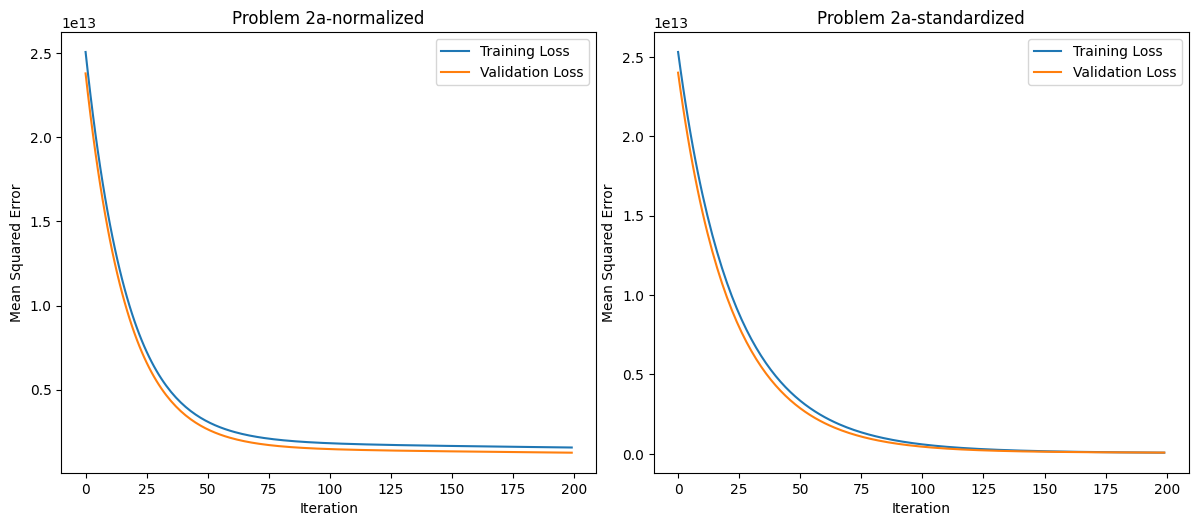

In [127]:
# Problem 2a - normalization

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars].values
X_val = df_test[num_vars].values

# fit and transform the training data (normalization)
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.fit_transform(X_val)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_2 = np.zeros((X_train.shape[1] + 1, 1))

# Train a simple linear regression model using gradient descent
train_losses_2a, val_losses_2a, theta_2 = gradient_descent(X_train_norm, X_val_norm, y_train, y_val, learning_rate, n_iterations, m, theta_2)

#-----------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

# Problem 2a - standardization

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars].values
X_val = df_test[num_vars].values

# fit and transform the training data (normalization)
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_3 = np.zeros((X_train.shape[1] + 1, 1))

# Train a simple linear regression model using gradient descent
train_losses_2a_std, val_losses_2a_std, theta_3 = gradient_descent(X_train_std, X_val_std, y_train, y_val, learning_rate, n_iterations, m, theta_3)


plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(train_losses_2a, label="Training Loss")
plt.plot(val_losses_2a, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2a-normalized")

# Plot training and validation. losses
plt.subplot(1, 2, 2)
plt.plot(train_losses_2a_std, label="Training Loss")
plt.plot(val_losses_2a_std, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2a-standardized")


plt.show()

In [128]:
print("Best parameters 2a:", theta_2[:3].T)
print("Best parameters 2a:", theta_3[:3].T)

Best parameters 2a: [[3021842.14412559 1075873.74651929 1309652.40116106]]
Best parameters 2a: [[ 4.71138219e+06  1.80942700e+05 -2.79523521e+03]]


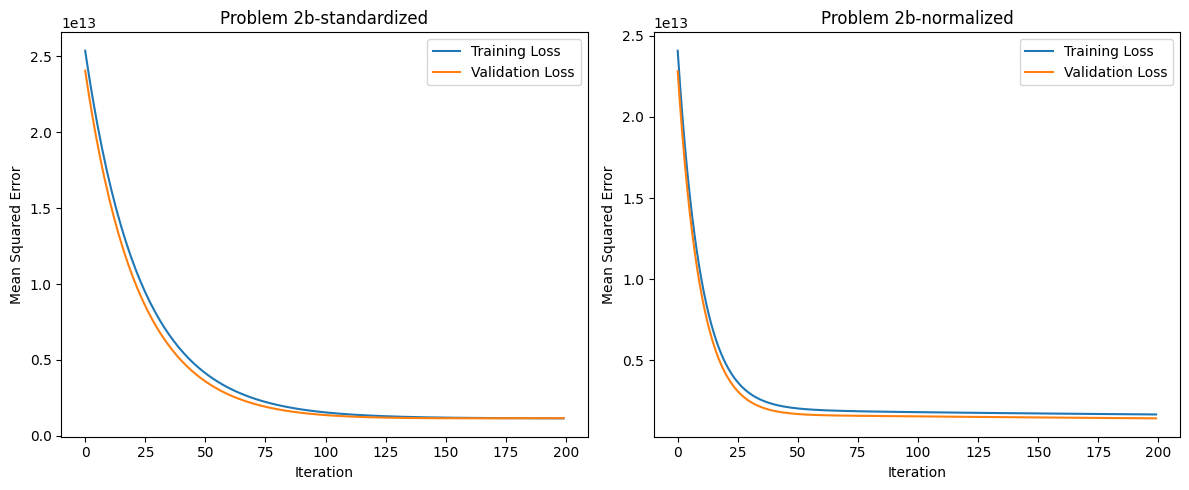

In [129]:
# Problem 2b - standardization

num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)


# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_4 = np.zeros((X_train.shape[1] + 1, 1))

# Train a simple linear regression model using gradient descent
train_losses_2b_std, val_losses_2b_std, theta_4 = gradient_descent(X_train_std, X_val_std, y_train, y_val, learning_rate, n_iterations, m, theta_4)

#------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

# Problem 2b - normalization

# selected inputs
num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.fit_transform(X_val)


# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_5 = np.zeros((X_train.shape[1] + 1, 1))

# train model
train_losses_2b_norm, val_losses_2b_norm, theta_5 = gradient_descent(X_train_norm, X_val_norm, y_train, y_val, learning_rate, n_iterations, m, theta_5)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# For problem 2b- standarized
ax1.plot(train_losses_2b_std, label="Training Loss")
ax1.plot(val_losses_2b_std, label="Validation Loss")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Mean Squared Error")
ax1.legend()
ax1.set_title("Problem 2b-standardized")
plt.grid()

# For problem 2b-normalized
ax2.plot(train_losses_2b_norm, label="Training Loss")
ax2.plot(val_losses_2b_norm, label="Validation Loss")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()
ax2.set_title("Problem 2b-normalized")
plt.grid()

plt.tight_layout()
plt.show()

In [130]:
print("Best parameters 2b:", theta_4[:3].T)
print("Best parameters 2b:", theta_5[:3].T)

Best parameters 2b: [[4711382.1907234   520876.46302125   99670.73969824]]
Best parameters 2b: [[1848473.01793572  721284.85183339  892462.43809367]]


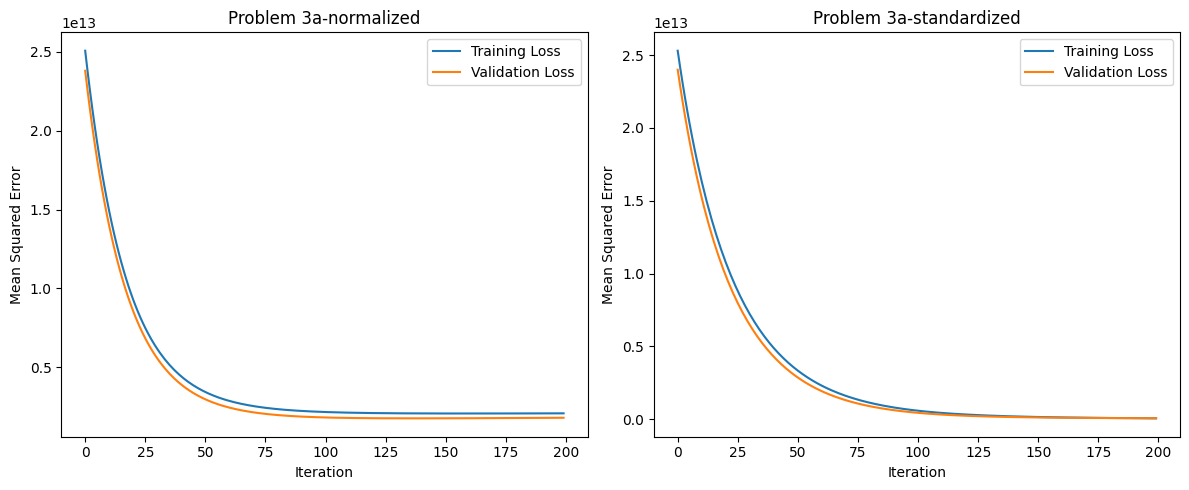

In [131]:
# Problem 3a

# Problem 3a - normalization
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars].values
X_val = df_test[num_vars].values

# fit and transform the training data (normalization)
X_train_norm_penalty = scaler_norm.fit_transform(X_train)
X_val_norm_penalty = scaler_norm.fit_transform(X_val)

learning_rate = 0.01
penalty = 100
n_iterations = 200
m = len(X_train)

theta_6 = np.zeros((X_train.shape[1] + 1, 1))

# Train a simple linear regression model using gradient descent
train_losses_3a_norm, val_losses_3a_norm, theta_6 = gradient_descent_penalty(X_train_norm_penalty, X_val_norm_penalty, y_train, y_val, learning_rate, n_iterations, m, theta_6, penalty)



#----------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------


# Problem 3a - standardization

num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)


# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_7 = np.zeros((X_train.shape[1] + 1, 1))
penalty = 0.1

# train model

train_losses_3a_std, val_losses_3a_std, theta_7 = gradient_descent_penalty(X_train_std, X_val_std, y_train, y_val, learning_rate, n_iterations, m, theta_7, penalty)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# For problem 3a -normalized
ax1.plot(train_losses_3a_norm, label="Training Loss")
ax1.plot(val_losses_3a_norm, label="Validation Loss")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Mean Squared Error")
ax1.legend()
ax1.set_title("Problem 3a-normalized")
plt.grid()

# For problem 3a-standardized
ax2.plot(train_losses_3a_std, label="Training Loss")
ax2.plot(val_losses_3a_std, label="Validation Loss")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()
ax2.set_title("Problem 3a-standardized")
plt.grid()

plt.tight_layout()
plt.show()


In [132]:
print("Best parameters 3a:", theta_6[:3].T)
print("Best parameters 3a:", theta_7[:3].T)

Best parameters 3a: [[3534695.84643405  674885.38993139  793661.10141058]]
Best parameters 3a: [[ 4.71138219e+06  1.81015535e+05 -2.73552722e+03]]


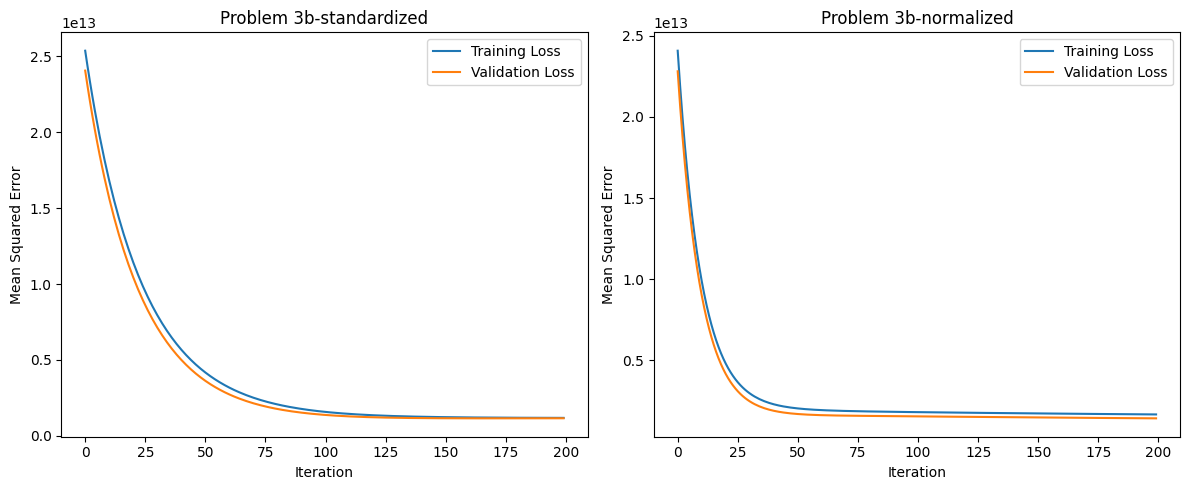

In [141]:
# Problem 3b - standardization

num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)


# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_8 = np.zeros((X_train.shape[1] + 1, 1))
penalty = 100

# train model
train_losses_3b_std, val_losses_3b_std, theta_8 = gradient_descent_penalty(X_train_std, X_val_std, y_train, y_val, learning_rate, n_iterations, m, theta_8, penalty)

##################################################################################################################################################


# Problem 3b - normalization

num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.fit_transform(X_val)

# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

# initial values
learning_rate = 0.01
n_iterations = 200
m = len(X_train)
theta_9 = np.zeros((X_train.shape[1] + 1, 1))
penalty = 1

train_losses_3b_norm, val_losses_3b_norm, theta_9 = gradient_descent_penalty(X_train_norm, X_val_norm, y_train, y_val, learning_rate, n_iterations, m, theta_9, penalty)


# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses_3b_std, label="Training Loss")
ax1.plot(val_losses_3b_std, label="Validation Loss")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Mean Squared Error")
ax1.legend()
ax1.set_title("Problem 3b-standardized")
plt.grid()

# Plot the training and validation loss after each iteration
ax2.plot(train_losses_3b_norm, label="Training Loss")
ax2.plot(val_losses_3b_norm, label="Validation Loss")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()
ax2.set_title("Problem 3b-normalized")
plt.grid()

plt.tight_layout()
plt.show()

In [142]:
print("Best parameters 3b:", theta_8[:3].T)
print("Best parameters 3b:", theta_9[:3].T)

Best parameters 3b: [[4711382.1907234   456721.4459491   126902.80394715]]
Best parameters 3b: [[1856071.05387104  718556.35238772  888917.47114604]]
